# Import Library

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

warnings.filterwarnings("ignore")

np.random.seed(123456)

In [2]:
data = pd.read_csv("Food Feature Engineering.csv", index_col=0).drop(
    ["catagory"], axis=1
)

In [3]:
data

,sub class,with skin,kcal(raw),kcal(cooked),frying method,kcal(fried)
name,,,,,,
"pork, rib",mammals,no,171.0,NaN,fry,273
"pork, loin",mammals,no,141.0,110.0,fry with flour,260
"pork, belly, with skin",mammals,yes,518.0,NaN,fry,550
"pork, ham",mammals,no,145.0,195.0,fry with flour,232
"pork, leg, with skin",mammals,yes,245.0,273.0,fry,325
"beef, brisket",mammals,no,155.0,225.0,fry,342
"beef, flank",mammals,no,136.0,178.0,fry with flour,268
"beef, round",mammals,no,168.0,224.0,fry,228
"beef, sirloin",mammals,no,201.0,244.0,fry,326


# Data Exploration

## info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, pork, rib to dough
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sub class      54 non-null     object 
 1   with skin      54 non-null     object 
 2   kcal(raw)      51 non-null     float64
 3   kcal(cooked)   42 non-null     float64
 4   frying method  54 non-null     object 
 5   kcal(fried)    54 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ KB


## describe

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
kcal(raw),51.0,156.764706,92.396448,11.0,109.50,139.0,157.00,518.0
kcal(cooked),42.0,175.476190,73.162778,84.0,143.25,159.5,179.00,548.0
kcal(fried),54.0,269.907407,92.999750,152.0,209.75,239.0,322.75,550.0


# Spliting Training set & Test set

In [6]:
target_name = ["kcal(fried)"]
feature_name = data.columns.drop(target_name)

In [7]:
X = data[feature_name]
y = data[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train = pd.DataFrame(X_train, columns=feature_name)
X_test = pd.DataFrame(X_test, columns=feature_name)

del data

# Data Preparation

## Missing Columns

In [8]:
X_train.isna().sum()

sub class        0
with skin        0
kcal(raw)        1
kcal(cooked)     8
frying method    0
dtype: int64

In [9]:
X_train.loc[X_train["kcal(raw)"].isna()]

,sub class,with skin,kcal(raw),kcal(cooked),frying method
name,,,,,
spring roll,instant food,no,NaN,174.0,fry


In [10]:
# นำ kcal(cooked) มาแทนใน kcal(raw) สำหรับ instant food
X_train.loc[X_train["kcal(raw)"].isna(), "kcal(raw)"] = X_train.loc[
    X_train["kcal(raw)"].isna(), "kcal(cooked)"
]
X_test.loc[X_test["kcal(raw)"].isna(), "kcal(raw)"] = X_test.loc[
    X_test["kcal(raw)"].isna(), "kcal(cooked)"
]

In [11]:
X_train.isna().sum()

sub class        0
with skin        0
kcal(raw)        0
kcal(cooked)     8
frying method    0
dtype: int64

## Drop Na

In [12]:
X_train = X_train.drop("kcal(cooked)", axis=1)

In [13]:
X_test = X_test.drop("kcal(cooked)", axis=1)

## Create Whale Data

In [14]:
X_train.columns

Index(['sub class', 'with skin', 'kcal(raw)', 'frying method'], dtype='object')

In [15]:
X_whale = pd.DataFrame(
    [
        ["mammals", "yes", 809, "fry with flour"],
        ["mammals", "no", 117, "fry with flour"],
    ],
    columns=X_train.columns,
    index=["whale blubber", "whale meat"],
)

## Feature Labeling

In [16]:
X_train

,sub class,with skin,kcal(raw),frying method
name,,,,
"chicken, gizzard",birds,no,94.0,fry with flour
"pork, rib",mammals,no,171.0,fry
squid,seafood,no,92.0,fry with flour
tofu,grain product,no,76.0,fry
mussels,seafood,no,82.0,fry with flour
"chicken, wings, with skin",birds,yes,140.0,fry with flour
"beef, round",mammals,no,168.0,fry
"pork, ham",mammals,no,145.0,fry with flour
"frog, leg",seafood,no,73.0,fry with flour


### numerical columns

In [17]:
numerical_columns = X_train.select_dtypes(include=np.number).columns

In [18]:
numerical_columns

Index(['kcal(raw)'], dtype='object')

### one_hot_columns

In [19]:
one_hot_columns = X_train.select_dtypes(exclude=np.number).columns

In [20]:
one_hot_columns = one_hot_columns.tolist()

In [21]:
one_hot_columns

['sub class', 'with skin', 'frying method']

### one hot encoding

In [22]:
for feature in one_hot_columns:
    enc = OneHotEncoder(handle_unknown="ignore")
    enc.fit(X_train[feature].to_numpy().reshape(-1, 1))

    one_hot_MSSubClass_train = enc.transform(
        X_train[feature].to_numpy().reshape(-1, 1)
    ).toarray()

    one_hot_MSSubClass_test = enc.transform(
        X_test[feature].to_numpy().reshape(-1, 1)
    ).toarray()

    one_hot_MSSubClass_whale = enc.transform(
        X_whale[feature].to_numpy().reshape(-1, 1)
    ).toarray()

    list_class = enc.categories_[0].tolist()

    list_class_str = [str(x) for x in list_class]

    list_class_col_name = [str(feature + "_" + x) for x in list_class_str]

    sub_calss_train = pd.DataFrame(
        one_hot_MSSubClass_train, columns=list_class_col_name, index=X_train.index
    )
    sub_calss_test = pd.DataFrame(
        one_hot_MSSubClass_test, columns=list_class_col_name, index=X_test.index
    )
    sub_calss_whale = pd.DataFrame(
        one_hot_MSSubClass_whale, columns=list_class_col_name, index=X_whale.index
    )

    X_train = pd.concat([X_train, sub_calss_train], axis=1).drop(columns=feature)
    X_test = pd.concat([X_test, sub_calss_test], axis=1).drop(columns=feature)
    X_whale = pd.concat([X_whale, sub_calss_whale], axis=1).drop(columns=feature)

In [23]:
X_train

,kcal(raw),sub class_birds,sub class_grain product,sub class_instant food,sub class_mammals,sub class_mammals product,sub class_seafood,sub class_vegetable product,with skin_no,with skin_yes,frying method_fry,frying method_fry with flour
name,,,,,,,,,,,,
"chicken, gizzard",94.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
"pork, rib",171.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
squid,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
tofu,76.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
mussels,82.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
"chicken, wings, with skin",140.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
"beef, round",168.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
"pork, ham",145.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
"frog, leg",73.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### update feature name

In [24]:
target_name = ["kcal(cooked)"]
feature_name = X_train.columns
n_features = len(feature_name)

## Feature Scaling

### target histogram

In [25]:
y_train = np.array(y_train)
y_test = np.array(y_test)

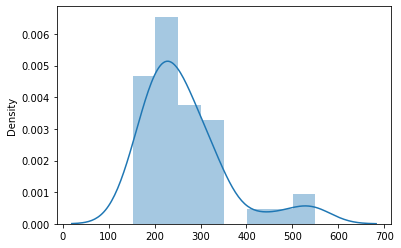

In [26]:
sns.distplot(y_train);

### standard scaler

In [27]:
scaler = StandardScaler()
scaler.fit(X_train[feature_name])
X_train[feature_name] = scaler.transform(X_train[feature_name])
X_test[feature_name] = scaler.transform(X_test[feature_name])
X_whale[feature_name] = scaler.transform(X_whale[feature_name])

# Model

## Linear

In [28]:
alphas = np.logspace(-10, 3, num=100)
reg = RidgeCV(alphas=alphas, cv=10)

## Fit

In [29]:
reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.35304777e-10, 1.83073828e-10, 2.47707636e-10,
       3.35160265e-10, 4.53487851e-10, 6.13590727e-10, 8.30217568e-10,
       1.12332403e-09, 1.51991108e-09, 2.05651231e-09, 2.78255940e-09,
       3.76493581e-09, 5.09413801e-09, 6.89261210e-09, 9.32603347e-09,
       1.26185688e-08, 1.70735265e-08, 2.31012970e-08, 3.12571585e-08,
       4.22924287e-08, 5.72236766e-0...
       9.54548457e-01, 1.29154967e+00, 1.74752840e+00, 2.36448941e+00,
       3.19926714e+00, 4.32876128e+00, 5.85702082e+00, 7.92482898e+00,
       1.07226722e+01, 1.45082878e+01, 1.96304065e+01, 2.65608778e+01,
       3.59381366e+01, 4.86260158e+01, 6.57933225e+01, 8.90215085e+01,
       1.20450354e+02, 1.62975083e+02, 2.20513074e+02, 2.98364724e+02,
       4.03701726e+02, 5.46227722e+02, 7.39072203e+02, 1.00000000e+03]),
        cv=10)

## Attributes

In [30]:
reg.alpha_

1.74752840000769

In [31]:
reg.coef_

array([[ 72.30304327,  -3.92236926,  13.18459009,  -7.55434016,
          0.22815186,  -3.05828556,   4.02172597,   2.63770492,
         -2.15187061,   2.15187061, -10.31137283,  10.31137283]])

In [32]:
reg.intercept_

array([265.])

# Prediction

## Training Set

In [33]:
y_pred_train = reg.predict(X_train).clip(0)

In [34]:
y_train = y_train.reshape(-1)
y_pred_train = y_pred_train.reshape(-1)

## Test Set

In [35]:
y_pred_test = reg.predict(X_test).clip(0)

In [36]:
y_test = y_test.reshape(-1)
y_pred_test = y_pred_test.reshape(-1)

# Evaluation

## Training Set

In [37]:
print("r2_score =\t\t\t", r2_score(y_train, y_pred_train))
print("mean_squared_error =\t\t", mean_squared_error(y_train, y_pred_train))
print("mean_absolute_error =\t\t", mean_absolute_error(y_train, y_pred_train))
print(
    "mean_absolute_percentage_error =",
    mean_absolute_percentage_error(y_train, y_pred_train),
)

r2_score =			 0.5723959337257007
mean_squared_error =		 3646.4881458198915
mean_absolute_error =		 41.748883257099095
mean_absolute_percentage_error = 0.1617363025229819


### Scatter Plot between Actual and Predicted Values

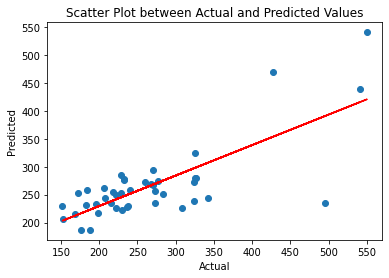

In [38]:
plt.scatter(y_train, y_pred_train)

m, b = np.polyfit(y_train, y_pred_train, 1)
plt.plot(y_train, m * y_train + b, color="red")

plt.title("Scatter Plot between Actual and Predicted Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

## Test Set

In [39]:
print("r2_score =\t\t\t", r2_score(y_test, y_pred_test))
print("mean_squared_error =\t\t", mean_squared_error(y_test, y_pred_test))
print("mean_absolute_error =\t\t", mean_absolute_error(y_test, y_pred_test))
print(
    "mean_absolute_percentage_error =",
    mean_absolute_percentage_error(y_test, y_pred_test),
)

r2_score =			 0.6419375366924898
mean_squared_error =		 2819.543632554564
mean_absolute_error =		 49.07016865596854
mean_absolute_percentage_error = 0.17953731429638387


### Scatter Plot between Actual and Predicted Values

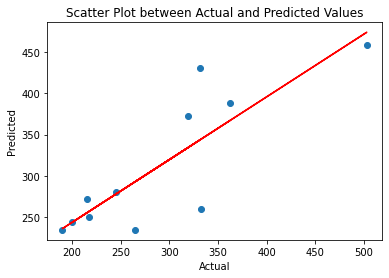

In [40]:
plt.scatter(y_test, y_pred_test)

m, b = np.polyfit(y_test, y_pred_test, 1)
plt.plot(y_test, m * y_test + b, color="red")

plt.title("Scatter Plot between Actual and Predicted Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

## Whale Data Set

In [41]:
X_whale

,kcal(raw),sub class_birds,sub class_grain product,sub class_instant food,sub class_mammals,sub class_mammals product,sub class_seafood,sub class_vegetable product,with skin_no,with skin_yes,frying method_fry,frying method_fry with flour
whale blubber,7.171187,-0.586302,-0.154303,-0.220863,1.439246,-0.320256,-0.550482,-0.154303,-1.607275,1.607275,-1.023533,1.023533
whale meat,-0.411821,-0.586302,-0.154303,-0.220863,1.439246,-0.320256,-0.550482,-0.154303,0.622171,-0.622171,-1.023533,1.023533


In [42]:
y_pred_whale = reg.predict(X_whale).clip(0)

In [43]:
y_pred_whale

array([[812.14465838],
       [254.27513866]])